In [11]:
# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

In [12]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np
# load dataset
(trainX, trainy), _ = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)


<div class="alert alert-block alert-danger">


2. Visualize some samples from the dataset with their corresponding labels.

3. Normalize the training data by dividing all values by 255.

4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.

6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

7. Compute the Davies-Bouldin score for all generated models.

8. Display the confusion matrix and the classification reports for all models. What do you observe?

9. Display some misclassifications for the best model (image with the true label and predicted label).

10. Try to enhance the performance of the best model.
<div/>

## 2. Visualize some samples from the dataset with their corresponding labels.


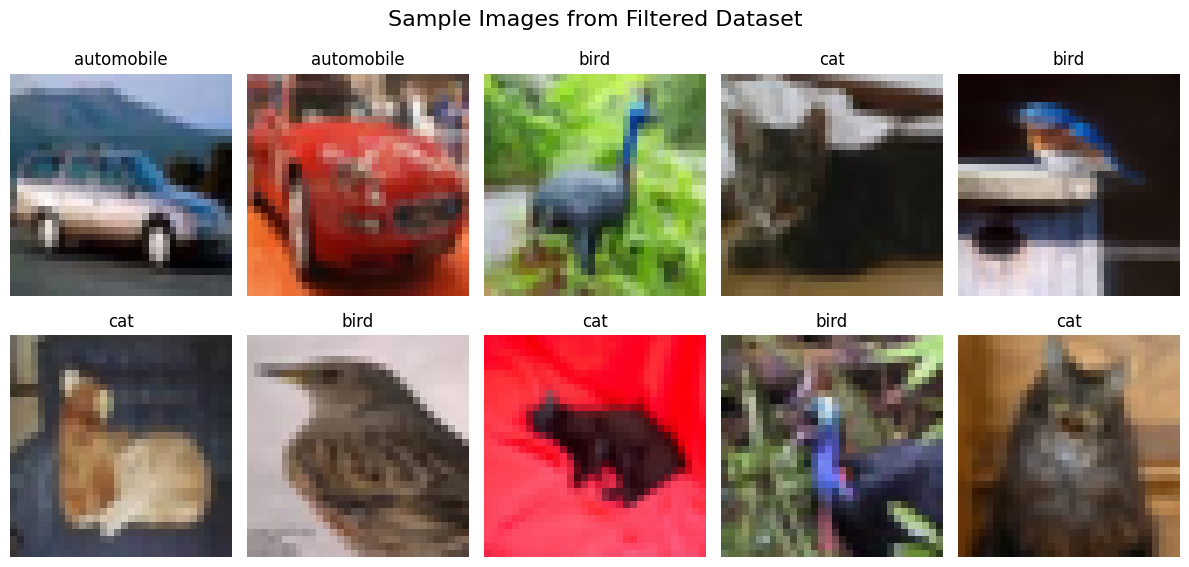

In [13]:
selected_classes = ["airplane", "automobile", "bird", "cat"]
selected_indices = [label_names.index(cls) for cls in selected_classes]

filtered_X = trainX[np.isin(trainy, selected_indices).flatten()]
filtered_y = trainy[np.isin(trainy, selected_indices).flatten()]

filtered_y_labels = np.array([label_names[label[0]] for label in filtered_y])

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Sample Images from Filtered Dataset", fontsize=16)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(filtered_X[i])
    ax.set_title(filtered_y_labels[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Normalize the training data by dividing all values by 255.



In [14]:
from sklearn.decomposition import PCA
filtered_X_normalized = filtered_X.astype('float32') / 255.0

n_samples = filtered_X_normalized.shape[0]
flattened_X = filtered_X_normalized.reshape(n_samples, -1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_X)



## 4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.



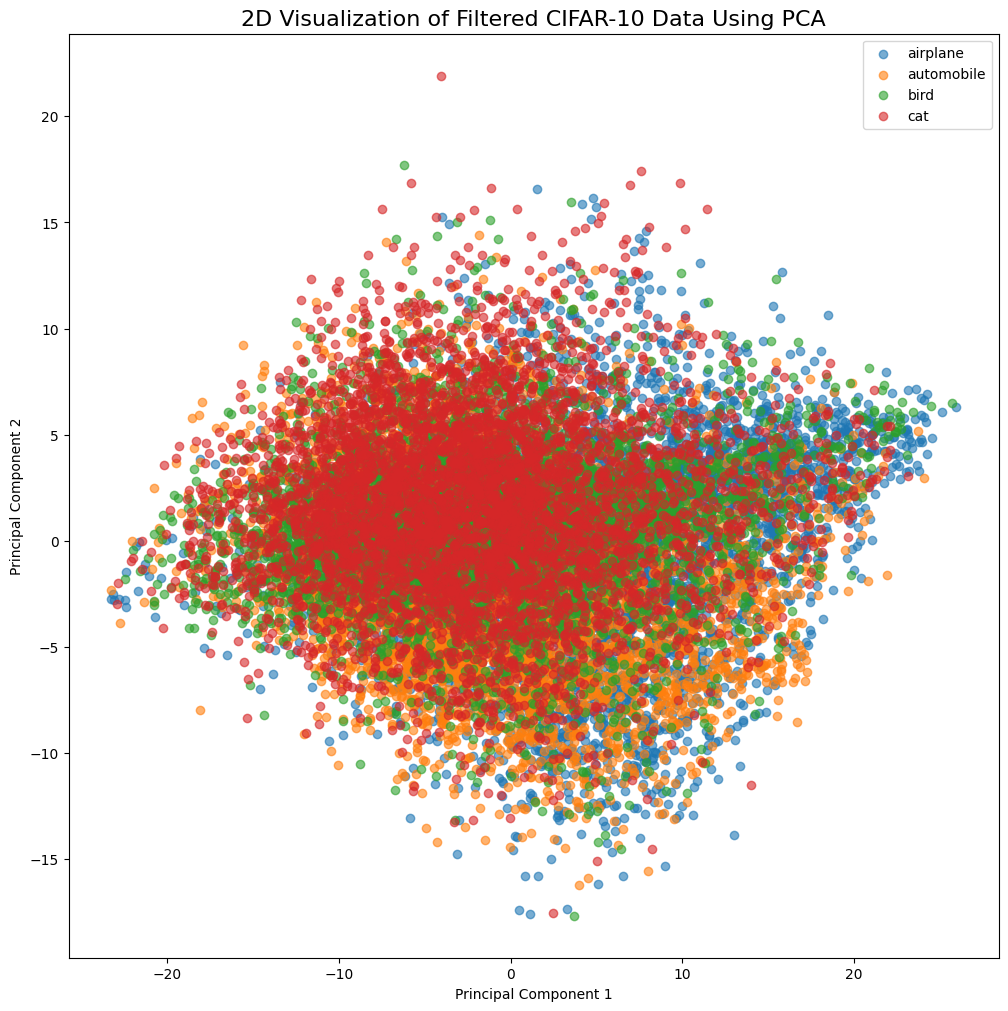

In [15]:

plt.figure(figsize=(12  , 12))
for cls in selected_classes:
    class_idx = np.where(filtered_y_labels == cls)[0]
    plt.scatter(pca_result[class_idx, 0], pca_result[class_idx, 1], label=cls, alpha=0.6)
 
plt.title("2D Visualization of Filtered CIFAR-10 Data Using PCA", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## 5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.



In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### K-means directly on normalized data

In [17]:

kmeans_basic = KMeans(n_clusters=len(selected_classes), random_state=42)
kmeans_basic_labels = kmeans_basic.fit_predict(flattened_X)
print("kmeans_basic centroids: \n \n", kmeans_basic.cluster_centers_)
print("kmeans_basic inertia : \n", kmeans_basic.inertia_)


kmeans_basic centroids: 
 
 [[0.76306856 0.8044226  0.8387027  ... 0.73969233 0.75851405 0.7670114 ]
 [0.30046645 0.30005142 0.26228946 ... 0.33624405 0.3255949  0.2829143 ]
 [0.45336896 0.4660794  0.43848342 ... 0.5594264  0.552386   0.5132467 ]
 [0.6727734  0.70337105 0.7205155  ... 0.44662464 0.4435443  0.41164917]]
kmeans_basic inertia : 
 2780889.5


### K-means with PCA (retain 95% variance)

In [18]:
pca_95 = PCA(n_components=0.95)
pca_95_data = pca_95.fit_transform(flattened_X)
kmeans_pca_95 = KMeans(n_clusters=len(selected_classes), random_state=42)
kmeans_pca_95_labels = kmeans_pca_95.fit_predict(pca_95_data)

print("kmeans_pca_95 centroids: \n", kmeans_pca_95.cluster_centers_)
print("\n kmeans_pca_95 inertia \n", kmeans_pca_95.inertia_)
print("\n number of component is\n", pca_95.n_components_)

kmeans_pca_95 centroids: 
 [[ 2.15201139e+00 -5.22573805e+00 -1.16637833e-02 -1.39151752e-01
  -1.89928152e-02 -5.64403608e-02  3.09495598e-01  2.45644018e-01
  -4.90315296e-02 -2.37016007e-02  3.76445167e-02 -3.81491496e-03
  -6.47851303e-02  4.78294306e-03  4.56108749e-02 -1.23517171e-01
   3.97296362e-02 -4.39236276e-02 -1.15027539e-01  1.17249666e-02
   1.88522190e-02 -8.39015469e-03  6.24752380e-02  5.84374964e-02
   6.05303459e-02  1.09767392e-02 -2.59409435e-02  1.52788963e-02
  -4.73769056e-03  1.46272813e-03  2.10752692e-02 -2.84267502e-04
  -1.88007336e-02  8.74294346e-05  2.04678043e-04 -1.10002160e-02
  -8.64425115e-03 -8.00598040e-03  7.47226551e-03 -1.33819552e-02
  -1.53370225e-03 -7.23532354e-03  1.94332027e-03 -9.85762384e-03
  -1.64678134e-03 -2.02269163e-02  1.62045145e-03  7.01560406e-04
  -6.63347170e-03 -1.13550937e-04 -8.74367170e-03  8.52969650e-04
  -1.20522976e-02 -9.62996483e-03 -5.14759542e-03  3.73655086e-04
  -3.90643291e-02 -2.06886162e-03  8.74058635e-04

### K-means with LDA (3 components)

In [ ]:
lda = LDA(n_components=3)
lda_data = lda.fit_transform(flattened_X, filtered_y.flatten())  
kmeans_lda = KMeans(n_clusters=len(selected_classes), random_state=42)
kmeans_lda_labels = kmeans_lda.fit_predict(lda_data)
print("kmeans_lda centroids: \n", kmeans_lda.cluster_centers_)
print("kmeans_lda inertia: \n", kmeans_lda.inertia_)


KeyboardInterrupt: 

## 6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?



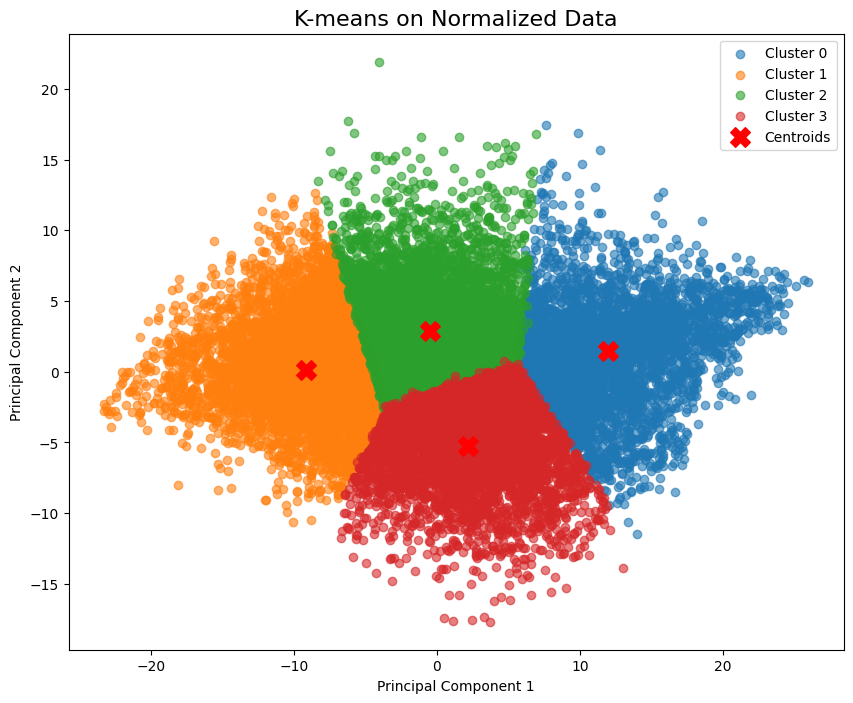

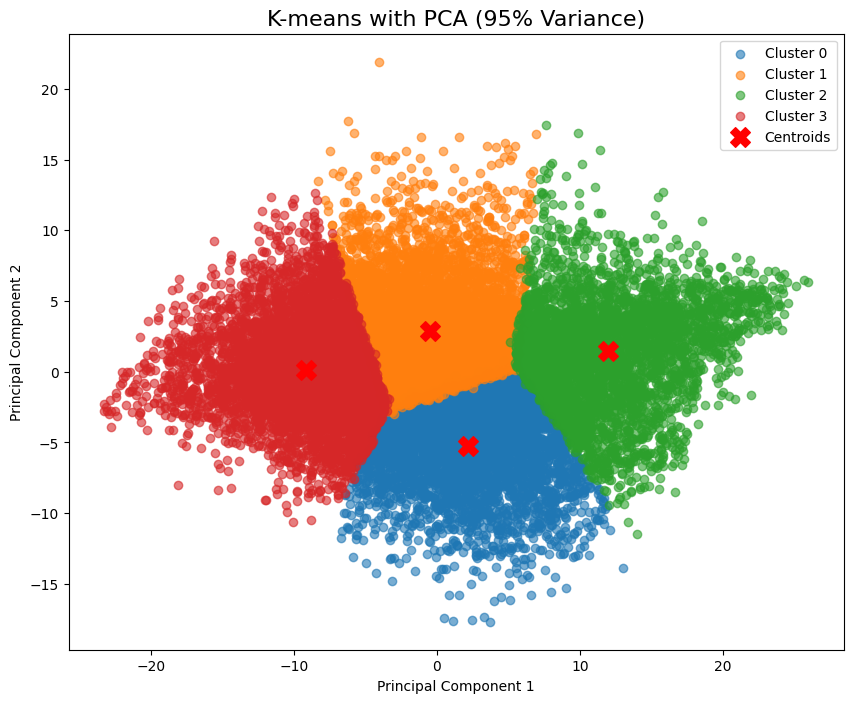

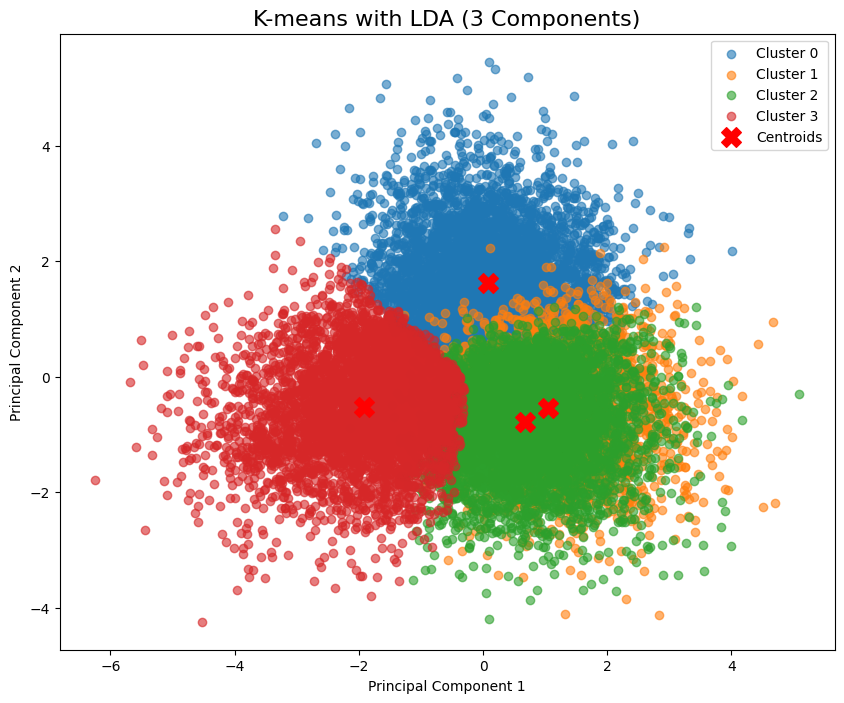

In [ ]:
def visualize_clustering(data_2d, labels, model, title, transformer=None):
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        cluster_points = data_2d[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label}", alpha=0.6)
    
    centroids = model.cluster_centers_
    if transformer:
        centroids = transformer.transform(centroids)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    plt.title(title, fontsize=16)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()


pca_2d = PCA(n_components=2)
flattened_X_2d = pca_2d.fit_transform(flattened_X)

# Visualize basic K-means
visualize_clustering(flattened_X_2d, kmeans_basic_labels, kmeans_basic, "K-means on Normalized Data", transformer=pca_2d)

# Visualize K-means with PCA (95% variance)
pca_95_2d = pca_2d.fit_transform(pca_95_data)
visualize_clustering(pca_95_2d, kmeans_pca_95_labels, kmeans_pca_95, "K-means with PCA (95% Variance)", transformer=pca_2d)

# Visualize K-means with LDA
lda_2d = pca_2d.fit_transform(lda_data)
visualize_clustering(lda_2d, kmeans_lda_labels, kmeans_lda, "K-means with LDA (3 Components)", transformer=pca_2d)

In [ ]:
print("kmeans_basic centroids.shape", kmeans_basic.cluster_centers_.shape)
print("kmeans_pca_95 centroids.shape", kmeans_pca_95.cluster_centers_.shape)
print("kmeans_lda centroids.shape", kmeans_lda.cluster_centers_.shape)


kmeans_basic centroids.shape (4, 3072)
kmeans_pca_95 centroids.shape (4, 200)
kmeans_lda centroids.shape (4, 3)


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score_basic = davies_bouldin_score(flattened_X, kmeans_basic_labels)
db_score_pca_95 = davies_bouldin_score(pca_95_data, kmeans_pca_95_labels)
db_score_lda = davies_bouldin_score(lda_data, kmeans_lda_labels)

print("Davies-Bouldin Scores:")
print("K-means on Normalized Data: ",db_score_basic)
print("K-means with PCA (95% Variance): ",db_score_pca_95)
print("K-means with LDA (3 Components): ",db_score_lda)


Davies-Bouldin Scores:
K-means on Normalized Data:  2.452368156221779
K-means with PCA (95% Variance):  2.3578427346232136
K-means with LDA (3 Components):  1.0626614674664077


The **Davies-Bouldin Score (DBS)** is a metric used to evaluate the quality of clustering results. It measures how well the clusters are separated and how compact they are. A lower Davies-Bouldin Score indicates better clustering, as it reflects clusters that are compact and well-separated. <br><br>
**Formula : **
$$ \text{DBS} = \frac{1}{N}\sum_{i=1}^{N}{ \max_{i\neq j}\bigg(\frac{S_i+Sj}{M_{ij}}\bigg)} $$
Where: <br>
- $N$: Number of clusters.
- $S_i$ Measure of scatter (compactness) for cluster $i$, typically the average distance between points in the cluster and its centroid.
   $$ S_i = \frac{1}{n_i} \sum_{x \in C_i}{\left\| x-c_i \right\|} $$
   $C_i$ is the cluster, $n_i$ is the number of points in $C_i$ and $c_i$ is the cluster centroid.	
- $M_{ij}$ Measure of separation between clusters $i$ and $j$ typically the Euclidean distance between their centroids:
  $$ M_{ij} = \left\| c_i-c_j \right\| $$

The Davies-Bouldin Score is the average of the "worst-case" similarity ratio $\Big(\frac{S_i+Sj}{M_{ij}}\Big)$ between each cluster and the cluster most similar to it.


## 8. Display the confusion matrix and the classification reports for all models. What do you observe?




Confusion Matrix for K-means on Normalized Data:



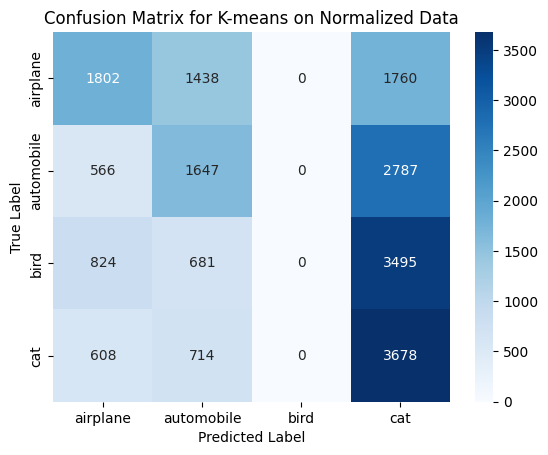


Classification Report for K-means on Normalized Data:

              precision    recall  f1-score   support

    airplane       0.47      0.36      0.41      5000
  automobile       0.37      0.33      0.35      5000
        bird       0.00      0.00      0.00      5000
         cat       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000


Confusion Matrix for K-means with PCA (95% Variance):



c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


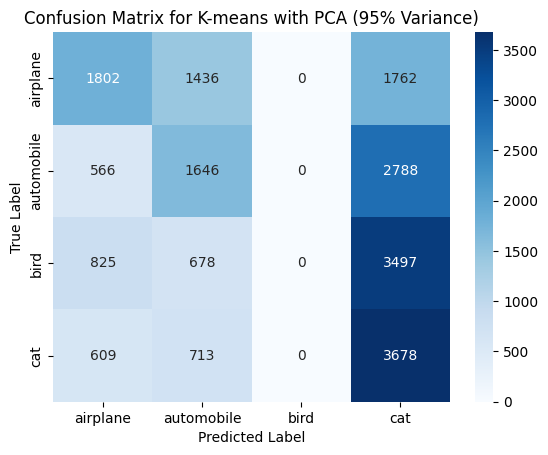


Classification Report for K-means with PCA (95% Variance):

              precision    recall  f1-score   support

    airplane       0.47      0.36      0.41      5000
  automobile       0.37      0.33      0.35      5000
        bird       0.00      0.00      0.00      5000
         cat       0.31      0.74      0.44      5000

    accuracy                           0.36     20000
   macro avg       0.29      0.36      0.30     20000
weighted avg       0.29      0.36      0.30     20000


Confusion Matrix for K-means with LDA (3 Components):



c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


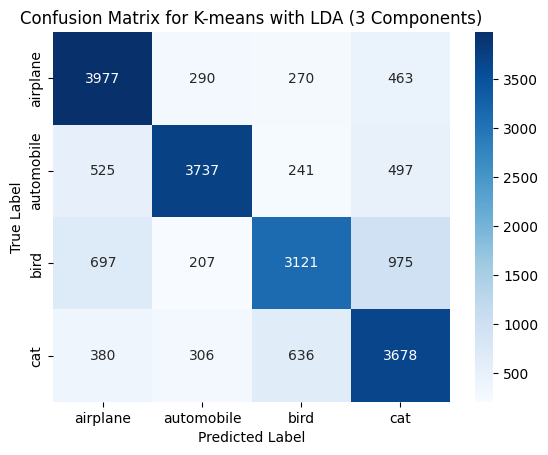


Classification Report for K-means with LDA (3 Components):

              precision    recall  f1-score   support

    airplane       0.71      0.80      0.75      5000
  automobile       0.82      0.75      0.78      5000
        bird       0.73      0.62      0.67      5000
         cat       0.66      0.74      0.69      5000

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def map_clusters_to_labels(cluster_labels, true_labels):
    label_mapping = {}
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        indices = np.where(cluster_labels == cluster)
        true_cluster_labels = true_labels[indices]
        most_common_label = np.bincount(true_cluster_labels.flatten()).argmax()
        label_mapping[cluster] = most_common_label
    return np.array([label_mapping[label] for label in cluster_labels])

models = {
    "K-means on Normalized Data": kmeans_basic_labels,
    "K-means with PCA (95% Variance)": kmeans_pca_95_labels,
    "K-means with LDA (3 Components)": kmeans_lda_labels,
}

for model_name, cluster_labels in models.items():
    predicted_labels = map_clusters_to_labels(cluster_labels, filtered_y)
    cm = confusion_matrix(filtered_y.flatten(), predicted_labels)
    print(f"\nConfusion Matrix for {model_name}:\n")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(filtered_y.flatten(), predicted_labels, target_names=selected_classes))



# Macro Average vs Weighted Average

## 1. Macro Average:
- **Definition**: Macro averaging calculates the **unweighted mean** of the metric (precision, recall, or F1-score) for all classes.
- **How it works**: Treats all classes equally, regardless of the number of samples in each class.

**Formula:**
$$ \text{Macro Average} = \frac{1}{C} \sum_{i=1}^{C} \text{Metric}_i $$

Where:  
- \( C \): Number of classes.  
- \( \text{Metric}_i \): Precision, Recall, or F1-score for class \( i \).

- **Use Case**:  
  Use the macro average when **class imbalance is not a concern**, and you want to treat all classes equally (e.g., performance evaluation where rare and frequent classes are equally important).

- **Example (from your data)**:  
  Precision Macro Avg = Average precision for "airplane," "automobile," "bird," and "cat," without considering how many samples each class has.

---

## 2. Weighted Average:
- **Definition**: Weighted averaging calculates the **weighted mean** of the metric, where the weight for each class is proportional to its number of samples (**support**).
- **How it works**: Gives more importance to classes with more samples.

**Formula:**
$$ \text{Weighted Average} = \frac{\sum_{i=1}^{C} (\text{Metric}_i \times \text{Support}_i)}{\sum_{i=1}^{C} \text{Support}_i} $$

Where:  
- \( C \): Number of classes.  
- \( \text{Metric}_i \): Precision, Recall, or F1-score for class \( i \).  
- \( \text{Support}_i \): Number of samples in class \( i \).

- **Use Case**:  
  Use the weighted average when you need to account for **class imbalance** and ensure that metrics are influenced more by classes with more samples.

- **Example (from your data)**:  
  Precision Weighted Avg = Weighted average of precision for all classes, giving more weight to "airplane," "automobile," "bird," or "cat" based on their number of samples (support).


## 9. Display some misclassifications for the best model (image with the true label and predicted label).



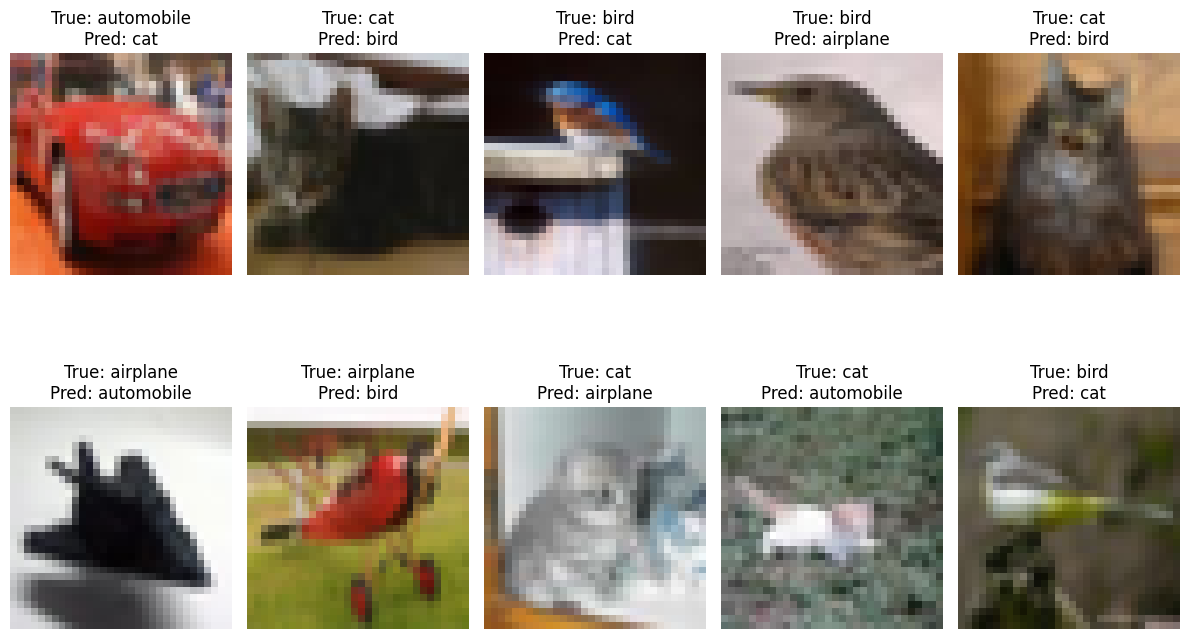

In [ ]:
best_model = "K-means with LDA (3 Components)" 
best_labels = models[best_model]
predicted_labels = map_clusters_to_labels(best_labels, filtered_y)

misclassified_indices = np.where(predicted_labels != filtered_y.flatten())[0]

plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:10]): 
    plt.subplot(2, 5, i + 1)
    plt.imshow(filtered_X[idx])
    plt.title(f"True: {label_names[filtered_y[idx][0]]}\nPred: {label_names[predicted_labels[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


## 10. Try to enhance the performance of the best model.

Enhanced Davies-Bouldin Score: 2.504594495920057


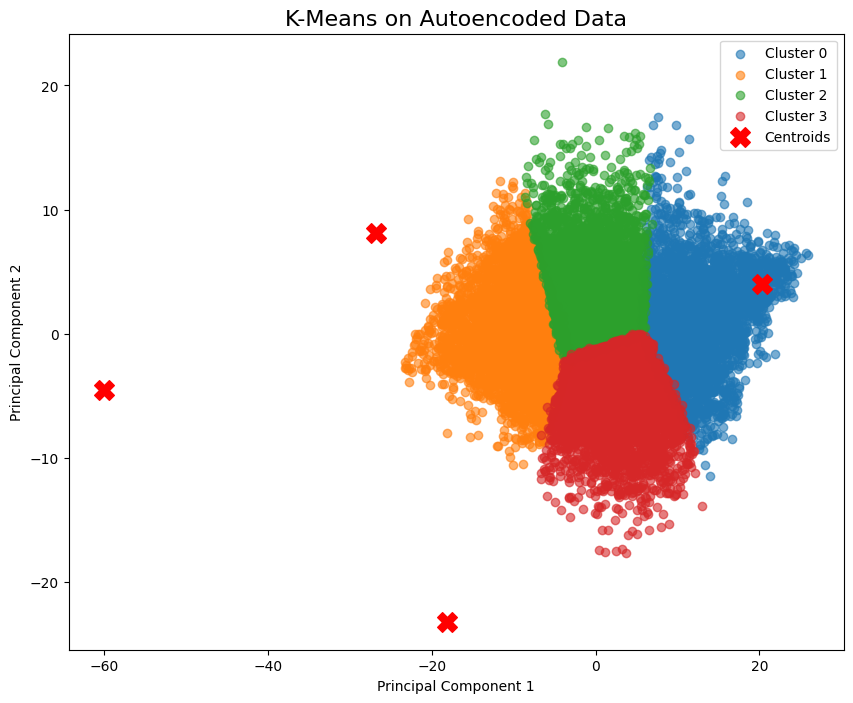

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(flattened_X)


kmeans_scaled = KMeans(n_clusters=4, random_state=42)
kmeans_scaled_labels = kmeans_scaled.fit_predict(trainX_scaled)

db_scaled = davies_bouldin_score(trainX_scaled, kmeans_scaled_labels)
print(f"Enhanced Davies-Bouldin Score: {db_scaled}")


pca_2d_auto = PCA(n_components=2)
encoded_X_2d = pca_2d_auto.fit_transform(flattened_X)
visualize_clustering(encoded_X_2d, kmeans_scaled_labels,kmeans_scaled,"K-Means on Autoencoded Data",transformer=pca_2d_auto)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0603
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0389
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0348
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0322
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0304
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0287
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0280
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0272
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0264
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0255
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0248
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0243
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0240
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0233
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0229
Epoc

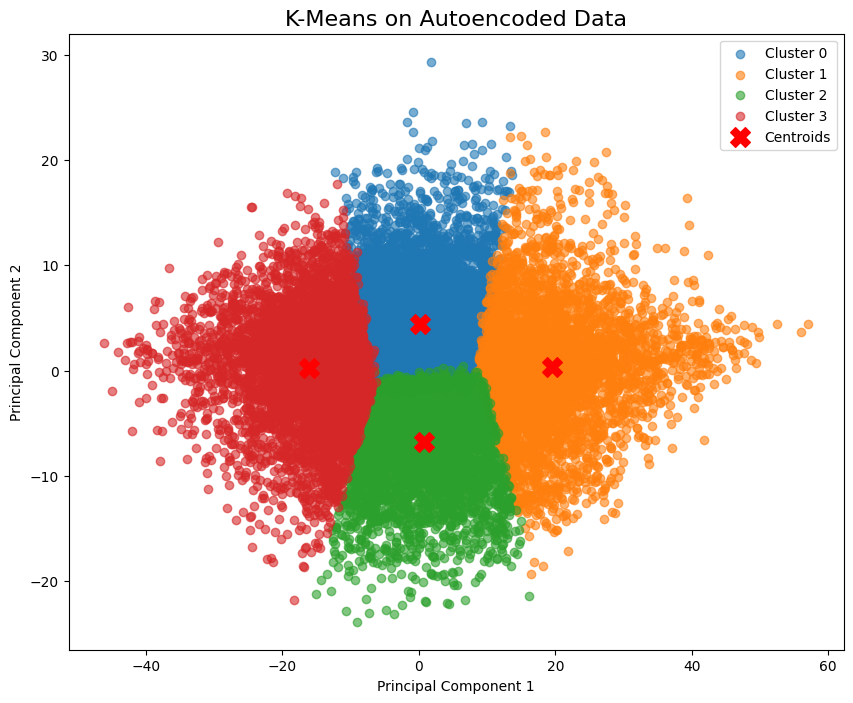

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Reshape, Input
from sklearn.preprocessing import StandardScaler

# Step 1: Train an Autoencoder for Dimensionality Reduction
input_dim = flattened_X.shape[1]
encoding_dim = 50  # Dimension for encoded features

# Autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(flattened_X, flattened_X, epochs=20, batch_size=256, shuffle=True, verbose=1)

# Use encoder part for dimensionality reduction
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_X = encoder_model.predict(flattened_X)

# Step 2: K-Means on Autoencoded Data
kmeans_auto = KMeans(n_clusters=len(selected_classes), random_state=42, n_init=20, max_iter=300)
kmeans_auto_labels = kmeans_auto.fit_predict(encoded_X)

# Evaluate using Davies-Bouldin score
db_score_auto = davies_bouldin_score(encoded_X, kmeans_auto_labels)
print(f"Davies-Bouldin Score (Autoencoder + K-Means): {db_score_auto:.4f}")

# Visualize clustering results
pca_2d_auto = PCA(n_components=2)
encoded_X_2d = pca_2d_auto.fit_transform(encoded_X)
visualize_clustering(encoded_X_2d, kmeans_auto_labels,kmeans_auto,"K-Means on Autoencoded Data",transformer=pca_2d_auto)
